In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for visualization
from ast import increment_lineno
import seaborn as sns
#sns.set_palette('rocket')
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#for modeling
from sklearn.model_selection import train_test_split #For train and test split
from sklearn.linear_model import LogisticRegression # For logistic regression algorithm
#from sklearn.neighbors import KNeighborsClassifier  # For KNN algorithm
from sklearn.svm import SVC                         # For SVC algorithm
from sklearn.tree import DecisionTreeClassifier     # For DecisionTree algorithm

In [4]:
iris = pd.read_csv('/content/Iris.csv')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Observations :**

1.There are 150 obseravtions with 4 features.

2.There is no null value.

3.There are 50 observations of each species.

**Data Visualization**

In [10]:
#for plotting pairplot i need to drop ID column
tmp = iris.drop('Id',axis = 1)

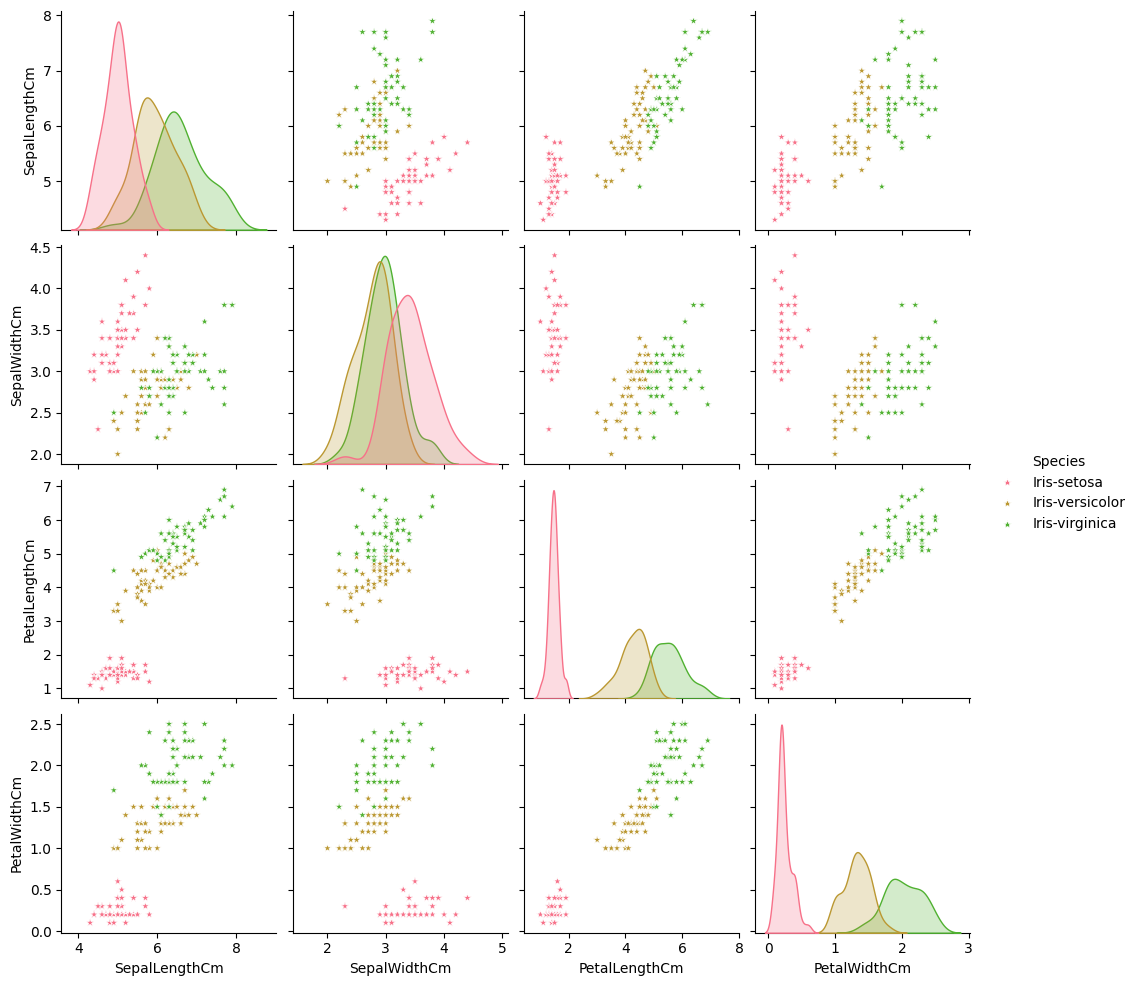

In [11]:
pairplot = sns.pairplot(tmp,hue ='Species',markers ='*')
plt.show()

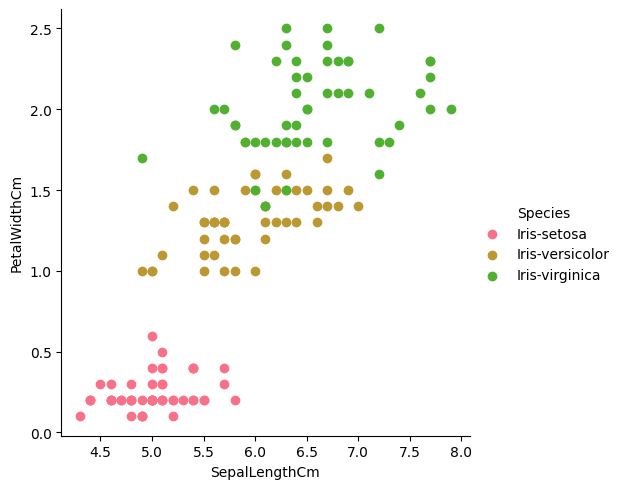

In [12]:
# plotting scatter-graph for Sepal length and Petal wisth
sns.FacetGrid(iris,hue ='Species',height=5) \
.map(plt.scatter,'SepalLengthCm','PetalWidthCm') \
.add_legend()

Note : Better to use Other palette other than rocket may be husl

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

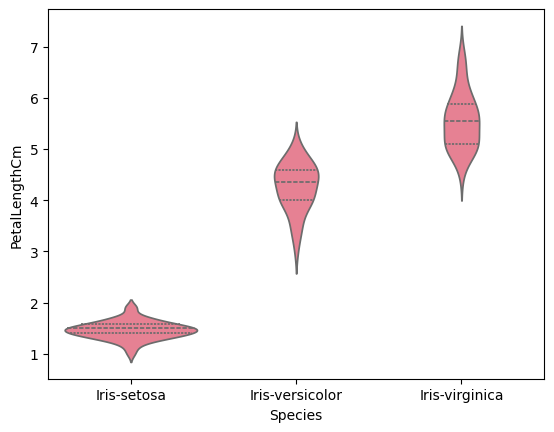

In [13]:
#making violin plot
sns.violinplot(x ='Species',y ='PetalLengthCm',data = iris, inner = 'quartile')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

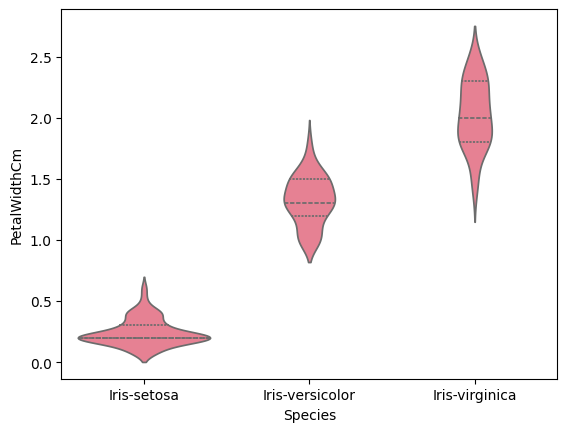

In [14]:
sns.violinplot(x ='Species',y='PetalWidthCm',data = iris,inner = 'quartile')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

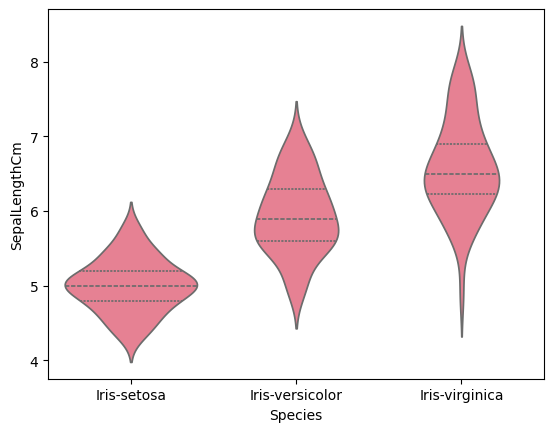

In [15]:
sns.violinplot(x = 'Species',y='SepalLengthCm',data = iris,inner = 'quartile')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

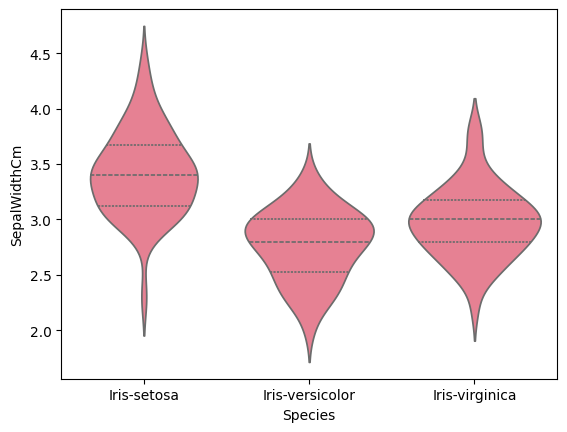

In [16]:
sns.violinplot(x ='Species',y = 'SepalWidthCm',data = iris,inner ='quartile')

**Modelling with skikit-learn**

In [17]:
x = iris.drop(['Id','Species'],axis =1)
y = iris['Species']

In [18]:
print(x.shape)

(150, 4)


In [20]:
print(y.shape)

(150,)


In [21]:
#splitting dataset into train and test
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.3,random_state = 1)

In [22]:
#printing splitted dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [23]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [24]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [25]:
y_train.head()

118     Iris-virginica
18         Iris-setosa
4          Iris-setosa
45         Iris-setosa
59     Iris-versicolor
Name: Species, dtype: object

In [26]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [27]:
from sklearn import metrics

**Model:1 Logistic Regression**

In [29]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
acc_log = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of Logistic Regression',acc_log)

The accuracy of Logistic Regression 0.9777777777777777


**Model:2 Decision Tree**

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred =dt.predict(x_test)
acc_dt = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of Decision Tree',acc_dt)

The accuracy of Decision Tree 0.9555555555555556


**Model:3 Support Vector Machine**

In [31]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
acc_svc = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of SVM',acc_svc)

The accuracy of SVM 0.9777777777777777


In [35]:
# to have a look at glance
Models = pd.DataFrame({
         'Model' : ['Logistic Regression','Decision Tree','Support Vector Machine'],
         'Score' : [acc_log,acc_dt,acc_svc]
})
Models.sort_values(by ='Score',ascending = False)

,Model,Score
0,Logistic Regression,0.977778
2,Support Vector Machine,0.977778
1,Decision Tree,0.955556
